### Single Serve Queuing System Simulation
*July 2019*

<br>

**Author - Jelena Lor**

*Statistics - Poisson and Uniform distribution*

<br>


*Includes interactive visualization which will only run on your own PC (jupyter lab is not yet compatable with interactive visualizations)*


Running simulation shows:
- How many customers in the store during any point of time (20 minutes time lapse)
- How many time the store is clsoed lae by 20, 40 etc minutes

<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive, fixed
import random
import math

In [7]:
# LOAD DATA
arrivals = []
with open(r"arrivals.dat", "r") as f:
    for line in f:
        arrivals.append(int(line))
        
service = []
with open(r"service.dat", "r") as f:
    for line in f:
        service.append(int(line))  
        
#--
# function to generate Poisson distribution (p_dist)
# input variables:
#  lam = the Poisson process rate (default = 1.0)
#  T = maximum arrival time (default = 10)
# return value:
#  list of arrival times, in ascending order, with maximum arrival time T
#--
def my_poisson(lam = 1.0, T = 10):
    t = 0
    i = 0
    more = True
    p_dist = []
    while (more):
        U = random.random()
        t = t - (1 / lam) * math.log(U)
        if ( t > T ):
            more = False
        else:
            i = i + 1
            p_dist.append(round(t, 2))
    return p_dist

# Single-server Queuing System

In [50]:
# VARIABLES
#Elapsed time in minutes
t = 0
#Number of customers arrivals --> Will be based on Poisson
Na = 0
#Number of customers departures --> Will be calculated
Nd = 0
#Number of customers in the system
N = 0
#Fixed time that customer can arrive to the system (From opening to close 9-5pm) 8 hours or 480 minutes
T = 480

#Other variables:
#How many customers per minute to arrive
lam = 0.08
#How long to serve customer --> between 2-8 minutes
a = 2
b = 8

# FUNCTIONS
def service_time(a, b):
    return round(np.random.uniform(a, b), 2)

def event_list(lam, T, a, b):
    arrival_times = my_poisson(lam = lam, T = T)
    service_finished = []
    queue = []
    time_counter = 0
    for index, arrival in enumerate(arrival_times):
        #Still serving previous customer --> add to the queue
        if index == 0:
                service_duration = service_time(a, b)
                depart = round(arrival + service_duration, 2)
                service_finished.append(depart)
                time_counter = depart

        elif index > 0:
            #Who cames first arrival or person in the queue?
            if arrival <= service_finished[-1]:
                queue.append(arrival)
                queue.pop(0)
                new_time = time_counter
                service_duration = service_time(a, b)
                depart = round(new_time + service_duration, 2)
                service_finished.append(depart)
                time_counter = depart

            elif len(queue) != 0 and queue[0] < arrival:
                #Remove from queue and serve
                queue.pop(0)
                new_time = time_counter
                service_duration = service_time(a, b)
                depart = round(new_time + service_duration, 2)
                service_finished.append(depart)
                time_counter = depart

            else:
                service_duration = service_time(a, b)
                depart = round(arrival + service_duration, 2)
                service_finished.append(depart)
                time_counter = depart
    return arrival_times, service_finished
    
def customer_counter(time_lapse, arr, dep, T):
    t = 0
    time = []
    number_customer = []
    while t <= T:
        t += time_lapse
        time.append(t)

        arrived_count = sum(c < t for c in arr)
        departed_count = sum(c < t for c in dep)

        customers_in_shop = arrived_count - departed_count
        number_customer.append(customers_in_shop)
    return time, number_customer

def closing_time(dep, T):
    if dep[-1] <= T:
        print("Normal Closing Time ", T )
    else:
        hour = 9 + int(dep[-1]/60)
        minutes = int(dep[-1]%60)
        if len(str(minutes)) == 1:
            print("Had to finish serve customers, closed store at %s.0%s" %(hour, minutes))
        else:
             print("Had to finish serve customers, closed store at %s.%s" %(hour, minutes))
                
def get_closing_summary(dep, T):
    if dep[-1] <= T:
        return 0
    elif (dep[-1] - T) < 10:
        return 10
    elif (dep[-1] - T) > 10 and (dep[-1] - T) < 20:
        return 20
    elif (dep[-1] - T) > 20 and (dep[-1] - T) < 30:
        return 30
    elif (dep[-1] - T) > 30 and (dep[-1] - T) < 40:
        return 40
    elif (dep[-1] - T) > 40 and (dep[-1] - T) < 50:
        return 50
    elif (dep[-1] - T) > 50 and (dep[-1] - T) < 60:
        return 60
    elif (dep[-1] - T) > 60 and (dep[-1] - T) < 70:
        return 70
    else:
        return 80
    
def get_labels(time):
    start = 9
    labels = []
    for t in time:
        hour = start + t // 60
        minutes = round(t%60, 2)
        if minutes == 0:     
            label = str(hour) + "." + "00"
        else:
            label = str(hour) + "." + str(minutes)
        labels.append(label)
    return labels
    
def build_store_profile(lam, T, a, b, time_lapse):
    #get data simulated
    arr, dep = event_list(lam, T, a, b)
    #get counter
    time, num = customer_counter(time_lapse, arr, dep, T)
    #get time labels
    labels_ = get_labels(time)
    #Build visualisation
    plt.figure(figsize = (20,4))
    sns.barplot(time, num)
    plt.xticks(np.arange(len(time)), labels_)
    plt.xlabel("Time")
    plt.ylabel("Number of customers in the store")
    plt.show()
    print("Average customers per hour ", lam*60)
    closing_time(dep, T)

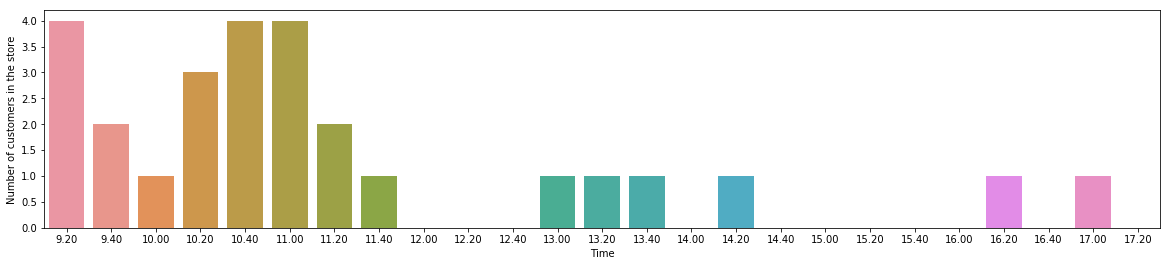

Average customers per hour  6.0
Had to finish serve customers, closed store at 17.05


In [51]:
lam = 0.1
T = 480
a = 2
b = 8
time_lapse = 20

build_store_profile(lam, T, a, b, time_lapse)

In [52]:
store_simulation = interactive(build_store_profile, lam = (0.1,0.8,0.1), T = fixed(480), \
                               a = (1,5,1), b = (3,10,1), time_lapse = {"five":5, "ten":10, "twenty":20})

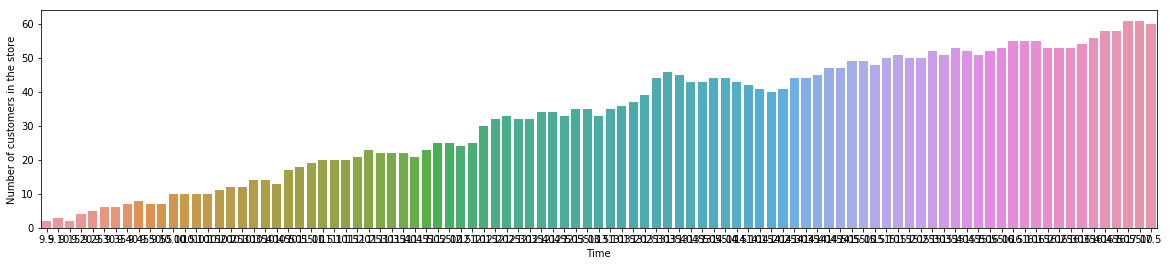

Average customers per hour  24.0
Had to finish serve customers, closed store at 21.26


In [53]:
store_simulation

In [66]:
def build_closing_profile(lam, T, a, b, time_lapse):
    #get data simulated
    arr, dep = event_list(lam, T, a, b)
    # Get closing summary
    return get_closing_summary(dep, T)

In [70]:
def store_closing(iterations, lam, T, a, b, time_lapse):
    iterations = iterations
    closing_times = []
    for i in range(iterations):
        cl = build_closing_profile(lam, T, a, b, time_lapse)
        closing_times.append(cl)

    plt.figure(figsize = (10, 3))
    value, counts = np.unique(closing_times, return_counts = True)
    sns.barplot(value, counts)
    plt.xlabel("Delay (in minutes) of store closing")
    plt.ylabel("Number of time store was closed late")
    plt.show()
    
    print("Average customers per hour ", lam*60)

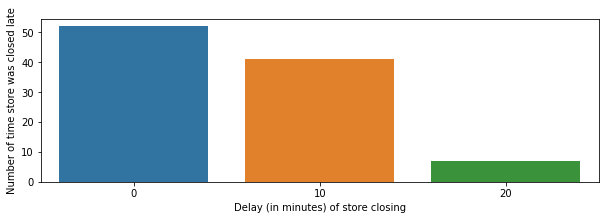

Average customers per hour  6.0


In [71]:
iterations = 100
lam = 0.1
T = 480
a = 2
b = 8
time_lapse = 20

store_closing(iterations, lam, T, a, b, time_lapse)

In [73]:
store_closing_simulation = interactive(store_closing, iterations = (50, 1000, 10), \
                                       lam = (0.05, 0.3, 0.05), T = fixed(480), time_lapse = fixed(20), a = (1, 5, 1), b = (3, 10, 1))

In [ ]:
store_closing_simulation